# Estimation of the effect of CO2 fertilization on atmospheric pCO2
Using Figure 6 of the IPCC AR5 as a guide for the fluxes and pool sizes.

![IPCC AR5 Figure 6](files/AR5_fig6.png)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pools_df = pd.read_excel('IPCC_AR5_pools_fluxes.xlsx', sheet_name='pool_sizes', index_col=0)
fluxes_df = pd.read_excel('IPCC_AR5_pools_fluxes.xlsx', sheet_name='fluxes', index_col=0)

Pools dataframe contains nearly all the data on pool sizes in the figure.

In [16]:
pools_df

,pre_size_Gt,post_2009_dGt,size_Gt,error_Gt,category
name,,,,,
atmosphere,589.000000,240.0,829.000000,10.0,atmosphere
surface_ocean,900.000000,NaN,900.000000,NaN,ocean
ocean_deep_sea,37100.000000,155.0,37255.000000,30.0,ocean
marine_biota,3.000000,NaN,3.000000,NaN,ocean
ocean_dissolved_organic,700.000000,NaN,700.000000,NaN,ocean
ocean_floor_sediment,1750.000000,NaN,1750.000000,NaN,ocean
land_vegetation,540.832691,-30.0,510.832691,145.0,land
land_fossil_fuel,1394.230971,-365.0,1029.230971,400.0,land
land_soil,1897.366596,NaN,1897.366596,500.0,land


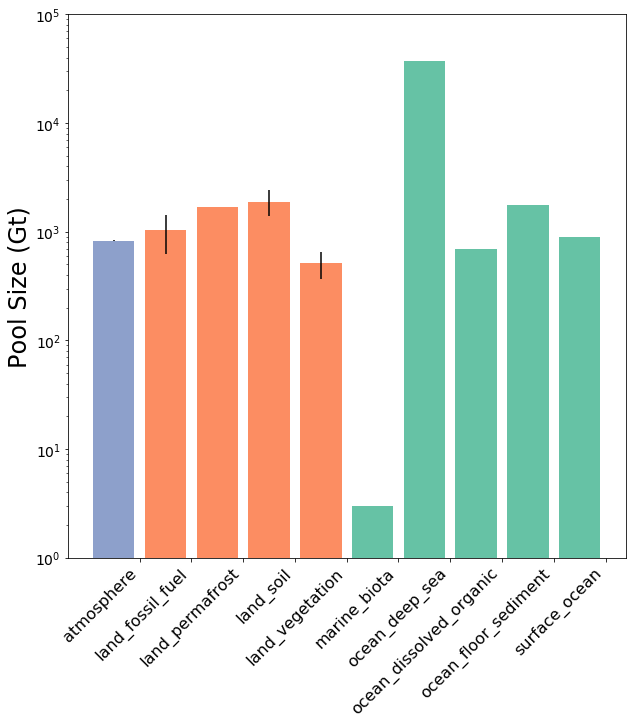

In [2]:
plt.figure(figsize=(10,10))
plt.yscale('log')

sorted_names = pools_df.index.sort_values()
sorted_sizes = pools_df.loc[sorted_names].size_Gt
sorted_errs = pools_df.loc[sorted_names].error_Gt
sorted_cats = pools_df.loc[sorted_names].category
xs = np.arange(sorted_names.size)
pal = sns.color_palette('Set2', n_colors=sorted_names.size)
cmap = {'ocean': pal[0], 'land': pal[1], 'atmosphere': pal[2]}
colors = [cmap[k] for k in sorted_cats.values]

plt.bar(xs, sorted_sizes, yerr=sorted_errs, color=colors)

plt.xticks(xs + 0.5, sorted_names.values, rotation=45, fontsize=16, ha='right')
plt.yticks(fontsize=14)
plt.ylabel('Pool Size (Gt)', fontsize=24)
plt.ylim(1e0, 1e5)
plt.show()

I was lazier with the fluxes since we are only considering effects of photosynthesis. Unfortunately the IPCC report does not clearly report oceanic photosynthesis. I assume that annual ocean net primary productivity (NPP) is the 50 - 37 - 11 - 2 Gt = 0 Gt difference between Marine biota inflows and outflows but this doesn't make sense because I know that oceanic photosynthesis has meaningful annual NPP on the same scale as terrestrial. 

I will just assume that the effect of CO2 fertilization is just to magnify the terrestrial NPP. We can very conservatively bound the scale of this effect at a 3x increase in annual biomass accumulation. This is an insane upper bound assuming that all the plants behave like cyanobacteria and model eukaryotic algae, which grow ~3x faster in saturating CO2. I will further multiply this by 2 to account for the fact that oceanic NPP doesn't appear to be included in the fluxes. So at very max we will see a 6x increase in global annual NPP. 

Net carbon uptake from land vegetation (gross photosynthesis less repiration and fire) is reported as 4.3 Gt by the IPCC figure. This is 10x less than Field & Falkowski, Science 1998 (48 Gt). NPP equals gross photosynthesis less plant respiration (NPP = GPP - plant respiration) so it doesn't account for fire and heterotrophic metabolism (i.e. eating plants). Could fire reasonably burn 44 Gt of carbon a year? 

Arora & Melton, Nature Comms 2018 report that wildfire emits 2-5 Gt of carbon/yr, which is not nearly enough to cover the gap. Therefore the difference must be due to heterotrophic (animal/fungal/bacterial) consumption of plants. This is consistent with various research showing that differences in net uptake by forests are determined by whole ecosystem respiration (e.g. Valentini et al. Nature 2000). In general, human appropriation of NPP is about 25% of total land NPP via harvesting (for human and animal food, industrial processes) and land use change (Krausmann et al. PNAS 2013) and bacterial respiration in the soil is a very large source of CO2. Another way of reading this is: plant matter is very easily degraded. 

Note: have to look into the magnitude of soil respiration and how it responds to increased organic matter. 

In [18]:
fluxes_df

,from,to,flux_pre_Gt,dflux_post_Gt,flux_Gt,error_Gt
name,,,,,,
land_gross_photosynthesis,atmosphere,land_vegetation,108.9,14.1,123.0,NaN
land_resp_fire,land_vegetation,atmosphere,107.2,11.6,118.8,NaN
land_net,atmosphere,land_vegetation,1.7,2.6,4.3,1.2
land_use_change,land_vegetation,atmosphere,NaN,1.1,1.1,0.8
ocean_atmosphere_gas_uptake,atmosphere,ocean,60.0,20.0,80.0,NaN
ocean_atmosphere_gas_release,ocean,atmosphere,60.7,17.7,78.4,NaN
ocean_net,atmosphere,ocean,0.7,2.3,3.0,0.7


I will assume terrestrial NPP will be increased by 6x from ~50 Gt yr to ~300 Gt C/yr. If all other factors (fire, respiration, human appropriation) increase proportionally, then the net land sink will increase to ~24 Gt yr. 

This is a best case estimate for lots of reasons, not in the least that 3x is an insane overestimate of the CO2 fertilization effect and human appropriation of NPP may scale superlinearly with NPP e.g. because of expanded biofuel usage. Nonetheless, I'll proceed under the assumption that the land sink grows to 24 Gt yr due to fertilization. 

In the best case, then, the total photosynthetic sink for organic carbon would be roughly $2\times10^1$ Gt which is 400x less than the $8 \times 10^2$ Gt C in the atmospheric pool and $2\times10^4$ fold less than the $4 \times 10^5$ Gt C in the oceanic pool. In order to 

In [30]:
# Calculate the size of the various pools to plot totals
cols = ['size_Gt', 'category']
agg_pools = pools_df[cols].groupby('category').sum()
agg_pools

,size_Gt
category,
atmosphere,829.000000
land,5137.430258
ocean,40608.000000


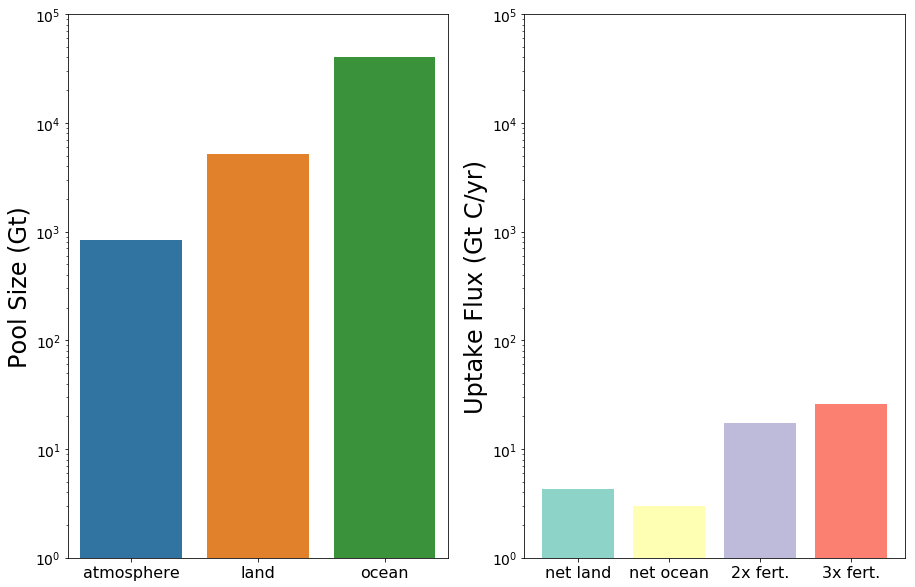

In [31]:
# Plotting the total pool sizes to compare to best case future fluxes under a 2-3x CO2 fertilization model
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.yscale('log')

sns.barplot(data=agg_pools, x=agg_pools.index, y='size_Gt')

plt.xticks(np.arange(agg_pools.index.size), agg_pools.index, fontsize=16, ha='center')
plt.yticks(fontsize=14)
plt.ylabel('Pool Size (Gt)', fontsize=24)
plt.xlabel('')
plt.ylim(1e0, 1e5)

plt.subplot(122)
plt.yscale('log')

xticks = ['net land', 'net ocean', '2x fert.', '3x fert.']
present_land_net = 4.3
present_ocean_net = 3.0
vals = np.array([present_land_net, present_ocean_net, 4*present_land_net, 6*present_land_net])

plt.xticks(np.arange(agg_pools.index.size), agg_pools.index, fontsize=16, ha='center')
xs = np.arange(len(xticks))
plt.bar(xs, vals, color=sns.color_palette('Set3', n_colors=len(xticks)))

plt.ylabel('Uptake Flux (Gt C/yr)', fontsize=24)
plt.xlabel('')
plt.xticks(xs, xticks, fontsize=16, ha='center')
plt.yticks(fontsize=14)
plt.ylim(1e0, 1e5)

plt.show()